In [1]:
"""
Theoretical metric proven "good articles" of the wikispeedia dataset.

Fletcher Collis, nov 2024
"""

'\nTheoretical metric proven "good articles" of the wikispeedia dataset.\n\nFletcher Collis, nov 2024\n'

In [2]:
#%pip install -r requirements.txt

['/Users/fletchercollis/Desktop/Applied data analysis/Project/ada-2024-project-adaholiks', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python311.zip', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python3.11', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python3.11/lib-dynload', '', '/Users/fletchercollis/opt/anaconda3/envs/CS-401_ADA/lib/python3.11/site-packages', '/Users/fletchercollis/Desktop/Applied data analysis/Project', '/Users/fletchercollis/Desktop/Applied data analysis/Project']
---- WARNING: The following articles have a problem: ----
Badugi has no links (out-edges) listed.
Color_Graphics_Adapter has no links (out-edges) listed.
Directdebit has no category listed.
Directdebit has no links (out-edges) listed.
Donation has no category listed.
Donation has no links (out-edges) listed.
Douglas_DC-4 has no links (out-edges) listed.
Duchenne_muscular_dystrophy has no links (out-edges) listed.
Friend_Directdebit has no category listed.
Klinefelte

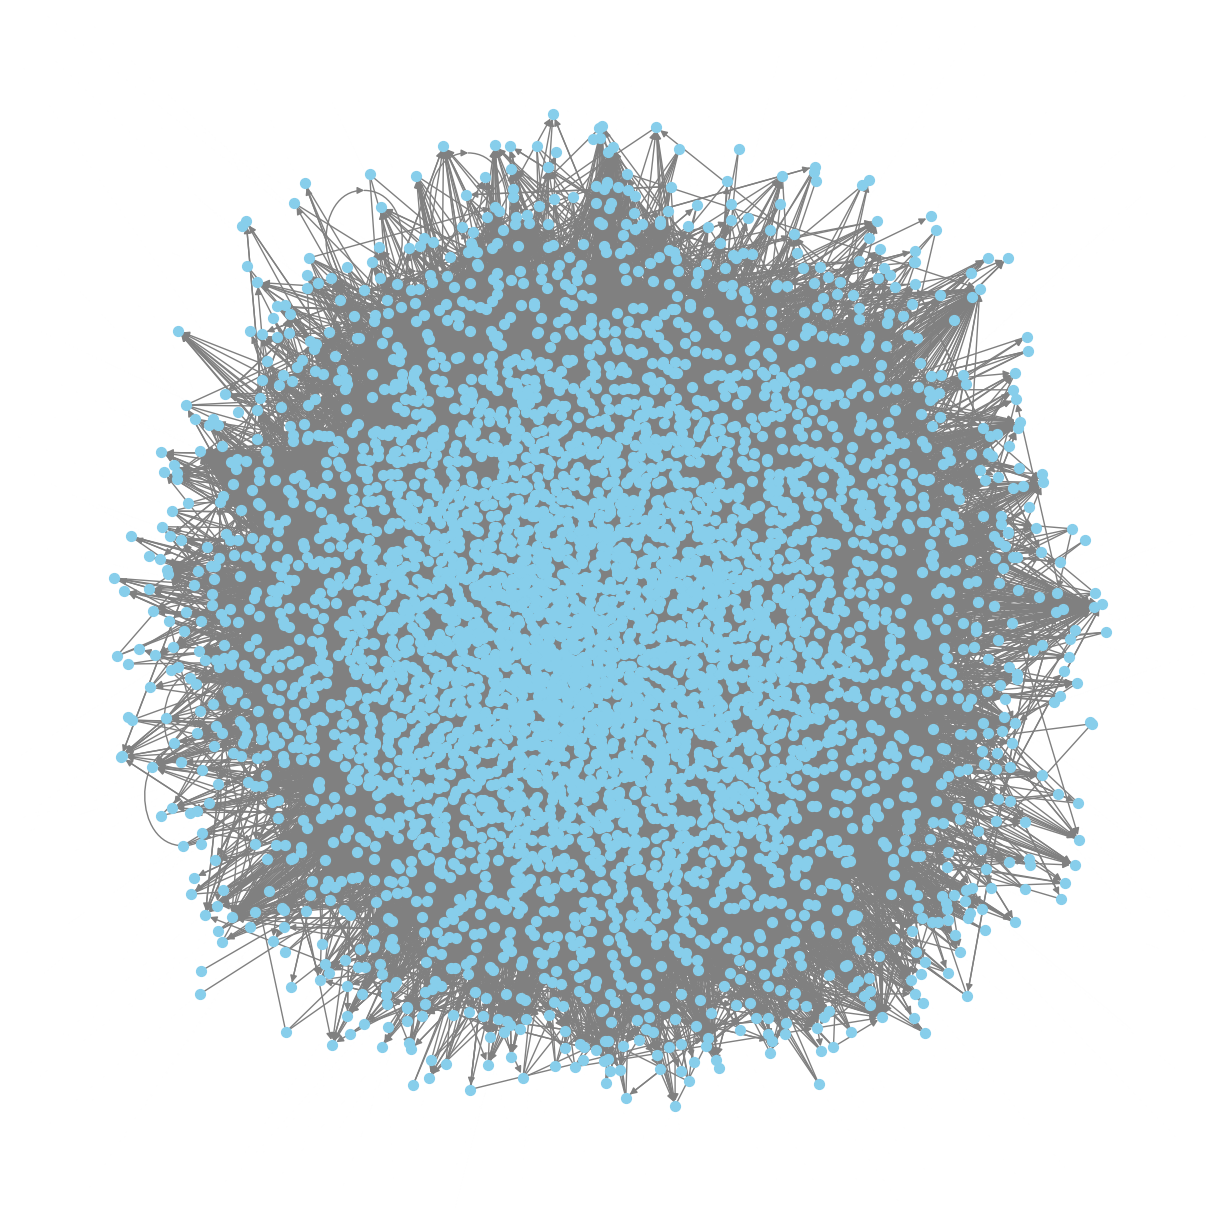

In [3]:
import pandas as pd
from src.load_data import *
from src.graph_data import *

### Checking if there are any impossible paths between two pairs

'''from collections import defaultdict

total_pairs = 0
unconnected_pairs = 0
connected_pairs = [] 

for source in G.nodes():

    for target in G.nodes():

        if source != target:

            total_pairs += 1

            if nx.has_path(G, source, target):

                connected_pairs.append((source, target))

            else:
                
                unconnected_pairs += 1

print(f"Total pairs of nodes: {total_pairs}")
print(f"Number of unconnected pairs: {unconnected_pairs}")'''

## Oscar's code to get all source and target pairs possible in the user dataframe

In [4]:
articles = load_articles_into_df()
categories = load_categories()
links = load_links()
paths_finished = load_paths_finished()
paths_unfinished = load_paths_unfinished()
distances = load_distances()

# Add a "finished" column to paths_finished
paths_finished['finished'] = True
paths_finished['failure_reason'] = None
# Extract the start_article and target_article from the `path` column
paths_finished['start_article'] = paths_finished['path'].apply(lambda x: x.split(';')[0])
paths_finished['target_article'] = paths_finished['path'].apply(lambda x: x.split(';')[-1])

# Same to paths_unfinished
paths_unfinished['finished'] = False
# Clean the paths_unfinished dataframe
# Rename 'type' to 'failure_reason'
paths_unfinished.rename(columns={'type': 'failure_reason', 'target' : 'target_article'}, inplace=True)
# extract the start_article from the `path` column
paths_unfinished['start_article'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0])

paths = pd.concat([paths_finished, paths_unfinished])

finished_paths = paths[paths['finished'] == True]

unique_pairs = finished_paths[['start_article', 'target_article']].drop_duplicates()

pair_counts = finished_paths.groupby(['start_article', 'target_article']).size().reset_index(name='count')

# Display the pairs along with their counts
pair_counts

,start_article,target_article,count
0,10th_century,11th_century,3
1,10th_century,Banknote,1
2,10th_century,Country,1
3,10th_century,Harlem_Globetrotters,2
4,10th_century,History_of_democracy,1
...,...,...,...
28713,Zulu,Language,1
28714,Zulu,Slovenia,2
28715,Zürich,Billie_Holiday,1
28716,Zürich,Mediterranean_Sea,1


#### Here I had an error concerning this article in the later loop that counts article "goodness"

In [5]:
for _,row in pair_counts.iterrows():
    if row['start_article'] == 'Wikipedia_Text_of_the_GNU_Free_Documentation_License':
        print('True')

    elif row['target_article'] == 'Wikipedia_Text_of_the_GNU_Free_Documentation_License':
        print('True')

True


## List of theoretical "good nodes"

Here, for every node, we count the times it is part of a shortest path. By doing this, we obtain a dataframe of nodes with a metric describing whether or not that are often good choices when playing the wikispeedia game through graph theory.

**Comment:** In this analysis, we have divided the count by the total number of shortest paths for each source-target pair. This normalization helps us measure the true importance of each article in the network. Without normalization, an article that appears in every shortest path for a specific source-target pair might seem highly important, even if it doesn’t play a critical role across the entire network. By normalizing, we avoid overemphasizing articles that are only crucial within specific source-target pairs and ensure that the count more accurately reflects an article’s overall significance in the network.

In [17]:
from collections import defaultdict

node_counts = defaultdict(int)

errors = 0

all_nb_of_shortest_paths = []

for _, row in pair_counts.iterrows():
    source = row['start_article']
    target = row['target_article']

    try:

        all_paths = list(nx.all_shortest_paths(G, source=source, target=target))

        nb_of_shortest_paths = len(all_paths)

        all_nb_of_shortest_paths.append(nb_of_shortest_paths)
        
        for path in all_paths:
            for node in path:
                if node != source and node != target:
                    node_counts[node] += 1/nb_of_shortest_paths

    except nx.NetworkXNoPath:
        # Skip this source-target pair if no path exists
        errors +=1


node_counts_df = pd.DataFrame(node_counts.items(), columns=['Node', 'ShortestPathCount'])

node_counts_df


,Node,ShortestPathCount
0,Scotland,238.417147
1,France,417.042087
2,Germany,614.765519
3,Mexico,124.337668
4,Dublin,29.001951
...,...,...
3730,2005_Sumatra_earthquake,0.008197
3731,Black_Wildebeest,0.062500
3732,Great_Spotted_Woodpecker,0.038961
3733,Green_Woodpecker,0.064935


### Results

In [18]:
# Sort by the 'ShortestPathCount' column in ascending order
node_counts_df = node_counts_df.sort_values(by='ShortestPathCount', ascending=False)
node_counts_df.head(20)

,Node,ShortestPathCount
27,United_States,2778.997827
124,United_Kingdom,1128.250118
77,Europe,809.943234
79,England,746.721314
174,Africa,716.774062
2,Germany,614.765519
92,World_War_II,534.374375
230,Japan,526.817727
143,Earth,480.186276
1,France,417.042087


**Comment:** Here, we display the first 20 articles identified as most important across the network. These articles are ranked based on their normalized shortest path count, highlighting those that play a critical role in connecting various parts of the network. We can notice that topics related to influential countries (like the United States and the United Kingdom), broad regions (such as Europe and Africa), and significant historical events (like World War II) are among the highest-ranked. This suggests that geopolitical, regional, and historical themes are central to the network's structure, serving as key connectors across diverse topics.

In [16]:
node_counts_df['ShortestPathCount'].describe()

count    3735.000000
mean       13.928782
std        63.764178
min         0.003125
25%         0.506233
50%         2.513890
75%         9.294983
max      2778.997827
Name: ShortestPathCount, dtype: float64

**Comment:** 
- *Count :* Here, we see that 3'735 out of 4'604 articles are active nodes in the games network, representing about 81% of the total. This suggests that the majority of articles contribute to the network's connectivity, while the remaining 19% may be more isolated or peripheral.
- *Mean :* The mean suggests most articles are not very important based on our metric. The quantiles support this, with the 25th and 50th percentiles showing that most articles appear in only a few shortest paths. A small number of articles are highly central, indicating a long-tailed distribution where a few nodes dominate the network.


## List of nodes that were successful for players

Here we look at the number of times articles have appeard in "successful" player paths. This is an indication of which articles players deem to be good for the game, as these atricles are the ones that are the most visited by the players.

In [13]:
# Attention ici, faudrait il aussi normaliser comme pour les articles theoriques?? 

from collections import Counter

all_articles = []
for path in finished_paths['path']:
    articles = path.split(';')
    if len(articles) > 2:  # Ensure there are at least three articles
        all_articles.extend(articles[1:-1])  # Exclude the first and last article

article_counts = Counter(all_articles)

article_counts_df = pd.DataFrame(article_counts.items(), columns=['Article', 'Count'])
article_counts_df = article_counts_df.sort_values(by='Count', ascending=False)

article_counts_df.head(10)


,Article,Count
33,<,20561
20,United_States,8824
7,Europe,4319
261,United_Kingdom,3860
201,Earth,3153
78,England,3123
5,Africa,2693
59,World_War_II,2225
19,North_America,1804
200,Germany,1676


In [ ]:
# Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(node_counts_df['ShortestPathCount'])
plt.title("Box Plot of ShortestPathCount")
plt.ylabel("ShortestPathCount")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of 'ShortestPathCount'
plt.figure(figsize=(10, 6))
plt.hist(node_counts_df['ShortestPathCount'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Node Counts in Shortest Paths")
plt.xlabel("Number of Times Node Appears in Shortest Paths")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()